In [1]:
import pandas as pd

import plotly.express as px
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


from tqdm.notebook import tqdm
tqdm.pandas()
pd.options.display.max_columns = 999

import plotly.graph_objects as go
import ipyvuetify as v

from ipywidgets import interact, Checkbox, Select, Output, widgets
import ipywidgets
from datetime import datetime

from IPython.display import display


import continental_level_plots
import country_level_plots
import flight_level_plots
import time

In [2]:
#### Import various plot file. In case the source file is modified, please rerun preprocess.py ####

# import preprocess
# preprocess.preprocess()

In [3]:

#read continental level data
continental_flows=pd.read_csv('./plot_files/continental_flows.csv',sep=',', keep_default_na=False, na_values=['', 'NaN'], index_col=0)
continental_flows_non_dir=pd.read_csv('./plot_files/continental_flows_non_dir.csv',sep=',', keep_default_na=False, na_values=['', 'NaN'], index_col=0)
conti_scatter=pd.read_csv('./plot_files/conti_scatter.csv',sep=',', keep_default_na=False, na_values=['', 'NaN'], index_col=0)
flights_df_conti=pd.read_csv('./plot_files/flights_df_conti.zip',compression='zip',sep=',', keep_default_na=False, na_values=['', 'NaN'], index_col=0)

#read country level data
country_flows=pd.read_csv('./plot_files/country_flows.csv',sep=',', keep_default_na=False, na_values=['', 'NaN'], index_col=0)
country_fixed=pd.read_csv('./plot_files/country_fixed.csv',sep=',', keep_default_na=False, na_values=['', 'NaN'], index_col=0)
country_fixed_sep_dom=pd.read_csv('./plot_files/country_fixed_sep_dom.csv',sep=',', keep_default_na=False, na_values=['', 'NaN'], index_col=0)

#read flight_level_data
flights_df=pd.read_csv('./plot_files/flights_df.zip',compression='zip', sep=',',keep_default_na=False, na_values=['', 'NaN'], index_col=0)

# 1- Flight distance, $CO_2$ emissions and prospects for decarbonization


In this section, AeroSCOPE is use dto evaluate te decarbonization potential of various alternative aircarft types (hydrgen aircraft, electric aircraft) at the global level.  
Then a similar analysis is conducted for two individual countries, Netherlands and Norway.  
_Since switching to hydrogen aviation will require high equipment cost, wee also look at thenumber of airporst to equip??_


* Hydrogen aircraft: <br> The aim of this artcile is not to provide a performance analysis of future hydrogen aircraft concepts. We will rely on Airbus ZeroE targets to define two aicraft nominal range. (https://www.airbus.com/en/innovation/low-carbon-aviation/hydrogen/zeroe)
    - 1000NM : Short range turboprop or fuel cell electric, 100 pax 
    - 2000NM : Short-Medium range turbofan (conventional or blended wing body), 150 pax 

* Battery electric aircraft: <br> hypothesis based on central case of https://www.sciencedirect.com/science/article/pii/S0376042118301179?via%3Dihub
    - 500NM : Ultra short range 180 pax




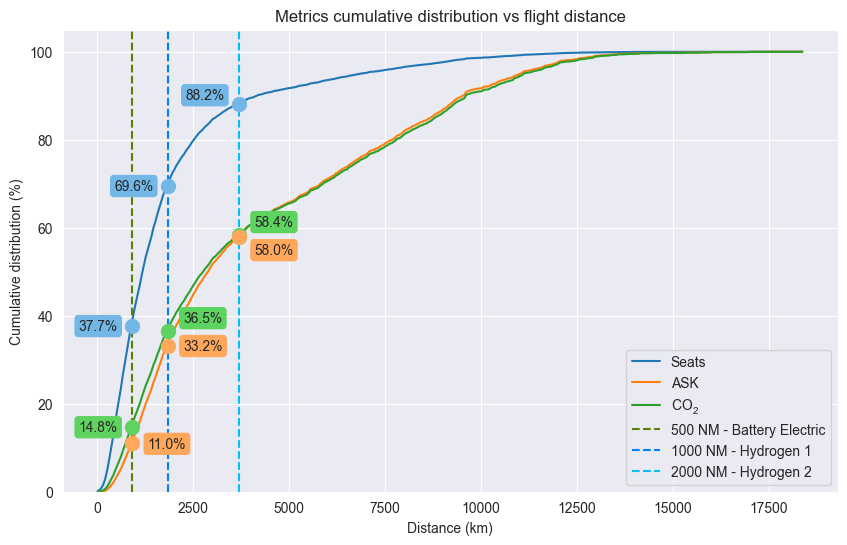

In [4]:
%matplotlib agg

#Directly using AeroSCOPE plot

sns.set_style("darkgrid")
# Create a new figure with a single subplot
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(flights_df, x='distance_km', weights='seats', label='Seats', element='poly',fill=False, cumulative = True, stat='percent', ax=ax,bins=range(0, int(flights_df["distance_km"].max()) + 50, 50),)
sns.histplot(flights_df, x='distance_km', weights='ask', label= 'ASK', element='poly',fill=False, cumulative = True, stat='percent',ax=ax,bins=range(0, int(flights_df["distance_km"].max()) + 50, 50),)
sns.histplot(flights_df, x='distance_km', weights='co2', label= '$\mathregular{CO_2}$', element='poly',fill=False, cumulative = True, stat='percent', ax=ax,bins=range(0, int(flights_df["distance_km"].max()) + 50, 50),)

ax.legend()

# Set the title, x-axis label, and y-axis label
ax.set_title("Metrics cumulative distribution vs flight distance")
ax.set_xlabel("Distance (km)")
ax.set_ylabel("Cumulative distribution (%)")



# Add vertical lines at 500, 1000, and 2000 NM
ax.axvline(x=500*1.852, color='#568203', linestyle='--', label='500 NM - Battery Electric')
ax.axvline(x=1000*1.852, color='#007FFF', linestyle='--', label='1000 NM - Hydrogen 1 ')
ax.axvline(x=2000*1.852, color='#00BFFF', linestyle='--', label='2000 NM - Hydrogen 2')





# Find the corresponding y-value at the intersection point
y_value = np.interp(500*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['co2'])/sum(flights_df['co2'])*100)
ax.scatter(500*1.852, y_value, marker='o',s=100, zorder=5, color='#5FD35F')
ax.annotate(f'{y_value:.1f}%', xy=(500*1.852-1400, y_value-1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#5FD35F'))

y_value = np.interp(1000*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['co2'])/sum(flights_df['co2'])*100)
ax.scatter(1000*1.852, y_value, marker='o',s=100, zorder=5, color='#5FD35F') 
ax.annotate(f'{y_value:.1f}%', xy=(1000*1.852+400, y_value+2),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#5FD35F'))


y_value = np.interp(2000*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['co2'])/sum(flights_df['co2'])*100)
ax.scatter(2000*1.852, y_value, marker='o',s=100, zorder=5, color='#5FD35F')  
ax.annotate(f'{y_value:.1f}%', xy=(2000*1.852+400, y_value+2),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#5FD35F'))




# NORWAY 

# Find the corresponding y-value at the intersection point
y_value = np.interp(500*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['seats'])/sum(flights_df['seats'])*100)
ax.scatter(500*1.852, y_value, marker='o',s=100, zorder=5, color='#73B7E7')
ax.annotate(f'{y_value:.1f}%', xy=(500*1.852-1400, y_value-1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#73B7E7'))

y_value = np.interp(1000*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['seats'])/sum(flights_df['seats'])*100)
ax.scatter(1000*1.852, y_value, marker='o',s=100, zorder=5, color='#73B7E7') 
ax.annotate(f'{y_value:.1f}%', xy=(1000*1.852-1400, y_value-1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#73B7E7'))


y_value = np.interp(2000*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['seats'])/sum(flights_df['seats'])*100)
ax.scatter(2000*1.852, y_value, marker='o',s=100, zorder=5, color='#73B7E7')  
ax.annotate(f'{y_value:.1f}%', xy=(2000*1.852-1400, y_value+1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#73B7E7'))



# NETHERLANDS
# Find the corresponding y-value at the intersection point
y_value = np.interp(500*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['ask'])/sum(flights_df['ask'])*100)
ax.scatter(500*1.852, y_value, marker='o',s=100, zorder=5, color='#FFA85C')
ax.annotate(f'{y_value:.1f}%', xy=(500*1.852+400, y_value-1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#FFA85C'))

y_value = np.interp(1000*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['ask'])/sum(flights_df['ask'])*100)
ax.scatter(1000*1.852, y_value, marker='o',s=100, zorder=5, color='#FFA85C') 
ax.annotate(f'{y_value:.1f}%', xy=(1000*1.852+400, y_value-1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#FFA85C'))


y_value = np.interp(2000*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['ask'])/sum(flights_df['ask'])*100)
ax.scatter(2000*1.852, y_value, marker='o',s=100, zorder=5, color='#FFA85C')  
ax.annotate(f'{y_value:.1f}%', xy=(2000*1.852+400, y_value-4),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#FFA85C'))



ax.legend()

fig.savefig('metric_repartition.pdf')
fig

As we can see in the plot above, although adressing a substantial share of the journeys, the 500 NM electric aircraft is only able to adress 14.8% of the emissions. 
Please keep in mind that this is only a simplified anlysis. 
Notbaly, two limitations exists:
-  We are not looking at these substitution aircraft performances but only at the potential market size. 
-  The network is not considered. reaching 100% of their potential would likely isolate aircraft on singles routes, which is unrealistic.


Now, we modify AeroMAPS original subplot to explore the potential of alternative aircrfat in two very diffrent european countries: the Netherlands and Norway

In [5]:



flights_NO= flights_df[flights_df['departure_country']=='NO'].reset_index()
flights_NL= flights_df[flights_df['departure_country']=='NL'].reset_index()

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12,7))
sns.histplot(flights_df, x='distance_km', weights='co2', label='World', element='poly',fill=False,color='#414A4C', cumulative = True, stat='percent', ax=ax,bins=range(0, int(flights_df["distance_km"].max()) + 10, 10),)
sns.histplot(flights_NO, x='distance_km', weights='co2', label= 'Norway', element='poly',fill=False, color='#BA0C2F', cumulative = True, stat='percent',ax=ax,bins=range(0, int(flights_df["distance_km"].max()) + 10, 10),)
sns.histplot(flights_NL, x='distance_km', weights='co2', label= 'Netherlands', element='poly',fill=False,color='#FF9B00', cumulative = True, stat='percent', ax=ax,bins=range(0, int(flights_df["distance_km"].max()) + 10, 10),)

ax.legend()

# Set the title, x-axis label, and y-axis label
ax.set_title("$\mathregular{CO_2}$ cumulative distribution vs flight distance")
ax.set_xlabel("Distance (km)")
ax.set_ylabel("$\mathregular{CO_2}$ cumulative distribution (%)")


# Add vertical lines at 500, 1000, and 2000 NM
ax.axvline(x=500*1.852, color='#568203', linestyle='--', label='500 NM - Battery Electric')
ax.axvline(x=1000*1.852, color='#007FFF', linestyle='--', label='1000 NM - Hydrogen 1 ')
ax.axvline(x=2000*1.852, color='#00BFFF', linestyle='--', label='2000 NM - Hydrogen 2')


# Find the corresponding y-value at the intersection point
y_value = np.interp(500*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['co2'])/sum(flights_df['co2'])*100)
ax.scatter(500*1.852, y_value, marker='o',s=100, zorder=5, color='#414A4C')
ax.annotate(f'{y_value:.1f}%', xy=(500*1.852-1200, y_value-1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='lightgray'))

y_value = np.interp(1000*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['co2'])/sum(flights_df['co2'])*100)
ax.scatter(1000*1.852, y_value, marker='o',s=100, zorder=5, color='#414A4C') 
ax.annotate(f'{y_value:.1f}%', xy=(1000*1.852+400, y_value-1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='lightgray'))


y_value = np.interp(2000*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['co2'])/sum(flights_df['co2'])*100)
ax.scatter(2000*1.852, y_value, marker='o',s=100, zorder=5, color='#414A4C')  
ax.annotate(f'{y_value:.1f}%', xy=(2000*1.852+400, y_value-1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='lightgray'))




# NORWAY 

# Find the corresponding y-value at the intersection point
y_value = np.interp(500*1.852, flights_NO['distance_km'].sort_values(), np.cumsum(flights_NO.sort_values(by='distance_km')['co2'])/sum(flights_NO['co2'])*100)
ax.scatter(500*1.852, y_value, marker='o',s=100, zorder=5, color='#BA0C2F')
ax.annotate(f'{y_value:.1f}%', xy=(500*1.852-1200, y_value-1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#F33F63'))

y_value = np.interp(1000*1.852, flights_NO['distance_km'].sort_values(), np.cumsum(flights_NO.sort_values(by='distance_km')['co2'])/sum(flights_NO['co2'])*100)
ax.scatter(1000*1.852, y_value, marker='o',s=100, zorder=5, color='#BA0C2F') 
ax.annotate(f'{y_value:.1f}%', xy=(1000*1.852-1200, y_value-1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#F33F63'))


y_value = np.interp(2000*1.852, flights_NO['distance_km'].sort_values(), np.cumsum(flights_NO.sort_values(by='distance_km')['co2'])/sum(flights_NO['co2'])*100)
ax.scatter(2000*1.852, y_value, marker='o',s=100, zorder=5, color='#BA0C2F')  
ax.annotate(f'{y_value:.1f}%', xy=(2000*1.852-1200, y_value+1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#F33F63'))



# NETHERLANDS
# Find the corresponding y-value at the intersection point
y_value = np.interp(500*1.852, flights_NL['distance_km'].sort_values(), np.cumsum(flights_NL.sort_values(by='distance_km')['co2'])/sum(flights_NL['co2'])*100)
ax.scatter(500*1.852, y_value, marker='o',s=100, zorder=5, color='#FF9B00')
ax.annotate(f'{y_value:.1f}%', xy=(500*1.852+400, y_value-1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#FFB647'))

y_value = np.interp(1000*1.852, flights_NL['distance_km'].sort_values(), np.cumsum(flights_NL.sort_values(by='distance_km')['co2'])/sum(flights_NL['co2'])*100)
ax.scatter(1000*1.852, y_value, marker='o',s=100, zorder=5, color='#FF9B00') 
ax.annotate(f'{y_value:.1f}%', xy=(1000*1.852+400, y_value-1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#FFB647'))


y_value = np.interp(2000*1.852, flights_NL['distance_km'].sort_values(), np.cumsum(flights_NL.sort_values(by='distance_km')['co2'])/sum(flights_NL['co2'])*100)
ax.scatter(2000*1.852, y_value, marker='o',s=100, zorder=5, color='#FF9B00')  
ax.annotate(f'{y_value:.1f}%', xy=(2000*1.852+400, y_value-4),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#FFB647'))



ax.legend()

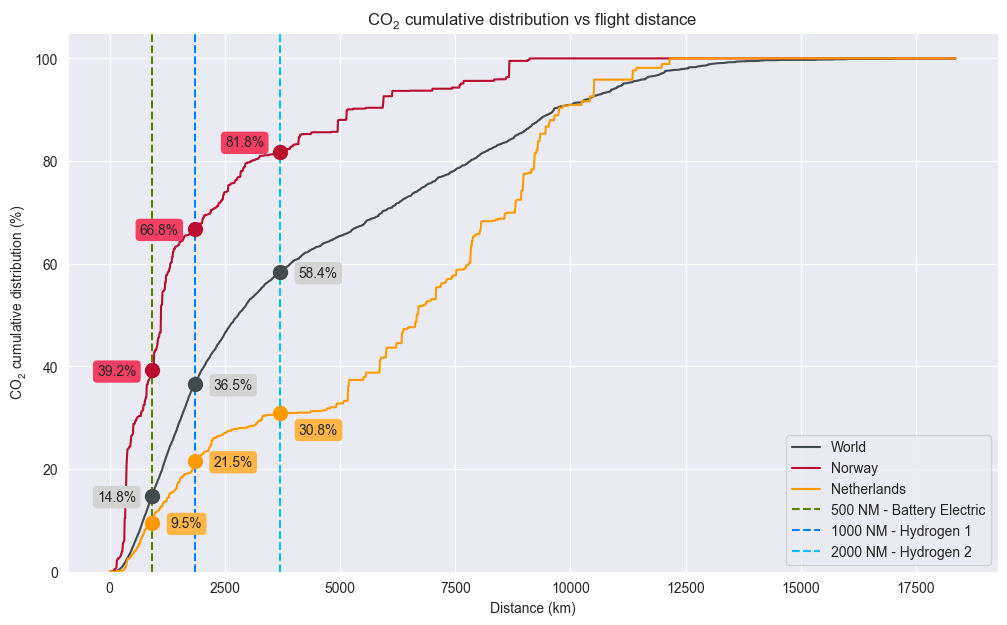

In [6]:
fig.savefig('repartition.pdf')
fig

In [7]:

flights_NO= flights_df[flights_df['departure_country']=='NO'].reset_index()
flights_NL= flights_df[flights_df['departure_country']=='NL'].reset_index()

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12,7))
sns.histplot(flights_NO, x='distance_km', weights='co2', label= 'Norway', element='poly',fill=False, color='#BA0C2F', cumulative = True, ax=ax,bins=range(0, int(flights_df["distance_km"].max()) + 10, 10),)
sns.histplot(flights_NL, x='distance_km', weights='co2', label= 'Netherlands', element='poly',fill=False,color='#FF9B00', cumulative = True, ax=ax,bins=range(0, int(flights_df["distance_km"].max()) + 10, 10),)

ax.legend()

# Set the title, x-axis label, and y-axis label
ax.set_title("$\mathregular{CO_2}$ cumulative vs flight distance")
ax.set_xlabel("Distance (km)")
ax.set_ylabel("$\mathregular{CO_2}$ cumulative ")


# Add vertical lines at 500, 1000, and 2000 NM
ax.axvline(x=500*1.852, color='#568203', linestyle='--', label='500 NM - Battery Electric')
ax.axvline(x=1000*1.852, color='#007FFF', linestyle='--', label='1000 NM - Hydrogen 1 ')
ax.axvline(x=2000*1.852, color='#00BFFF', linestyle='--', label='2000 NM - Hydrogen 2')



# NORWAY 

y_value = np.interp(1000*1.852, flights_NO['distance_km'].sort_values(), np.cumsum(flights_NO.sort_values(by='distance_km')['co2']))
ax.scatter(1000*1.852, y_value, marker='o',s=100, zorder=5, color='#BA0C2F') 
ax.annotate(f'{y_value:.2f}', xy=(1000*1.852-1200, y_value-1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#F33F63'))


y_value = np.interp(2000*1.852, flights_NO['distance_km'].sort_values(), np.cumsum(flights_NO.sort_values(by='distance_km')['co2']))
ax.scatter(2000*1.852, y_value, marker='o',s=100, zorder=5, color='#BA0C2F')  
ax.annotate(f'{y_value:.2f}', xy=(2000*1.852-1200, y_value+1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#F33F63'))



# NETHERLANDS

y_value = np.interp(1000*1.852, flights_NL['distance_km'].sort_values(), np.cumsum(flights_NL.sort_values(by='distance_km')['co2']))
ax.scatter(1000*1.852, y_value, marker='o',s=100, zorder=5, color='#FF9B00') 
ax.annotate(f'{y_value:.2f}', xy=(1000*1.852+400, y_value-1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#FFB647'))


y_value = np.interp(2000*1.852, flights_NL['distance_km'].sort_values(), np.cumsum(flights_NL.sort_values(by='distance_km')['co2']))
ax.scatter(2000*1.852, y_value, marker='o',s=100, zorder=5, color='#FF9B00')  
ax.annotate(f'{y_value:.2f}', xy=(2000*1.852+400, y_value-4),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#FFB647'))



ax.legend()

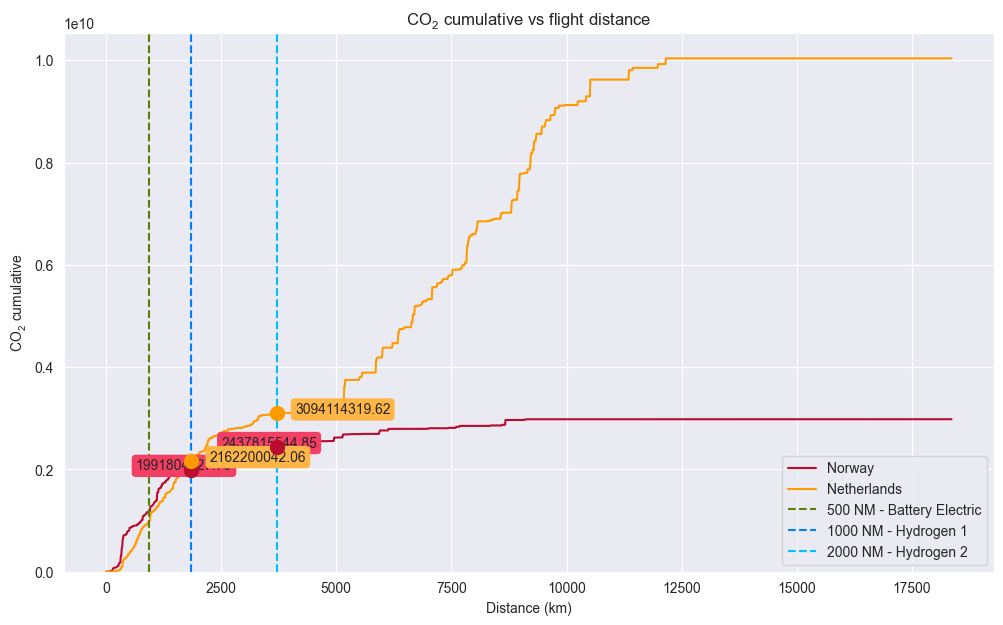

In [8]:
fig

As we can see in the plot above, Norway is highly dominated by short haul routes, and it would be even more impressive if one used the number of available seats as a metric.   
On the other hand, the netherlands have practically no domestic aviation and Amtsterdam is a major international hub severd by many long haul routes. 

If one is to think about each country decarbonisation plans, this information is very insightfull. In a simplified case where all of these routes would be served by an airline served in this country, Norway could adress 40% of their emissions using an electric aircraft and 82% using hydrogen aircraft, while these values fall to 9.5 and 31% n the second case. 

Once again, the aim of the study is not to focus on the related carbon abatement. 
According to https://app.electricitymaps.com/, the Norwegian electricity emission factor was 35 gCO2/kWh in 2019, while netherlands were producing electricity at 407 gCO2/kWh. This increse the gap highlighted above. Howver, this is of limited interest, and 2030-2050 emissions factors should be considered instead, and that is the focus of AeroMAPS.



In [9]:

##
flights_NL_g = flights_NL.groupby(['iata_departure','iata_arrival']).agg({
    'co2': 'sum',
    'ask': 'sum',
    'seats': 'sum',
    'arrival_lon': 'first',
    'arrival_lat': 'first',
    'departure_lon': 'first',
    'departure_lat': 'first',
    
'distance_km': 'first'}).reset_index()

flights_NL_g.sort_values(by='co2').nlargest(350,columns='co2')['co2'].sum()/flights_NL_g['co2'].sum()
flights_NL_g_top=flights_NL_g#.sort_values(by='co2').nlargest(350,columns='co2').reset_index()



flights_NO_g = flights_NO.groupby(['iata_departure','iata_arrival']).agg({
    'co2': 'sum',
    'ask': 'sum',
    'seats': 'sum',
    'arrival_lon': 'first',
    'arrival_lat': 'first',
    'departure_lon': 'first',
    'departure_lat': 'first',
    
'distance_km': 'first'}).reset_index()

flights_NO_g.sort_values(by='co2').nlargest(350,columns='co2')['co2'].sum()/flights_NO_g['co2'].sum()
flights_NO_g_top=flights_NO_g#.sort_values(by='co2').nlargest(350,columns='co2').reset_index()


fl_g=pd.concat([flights_NL_g, flights_NO_g])

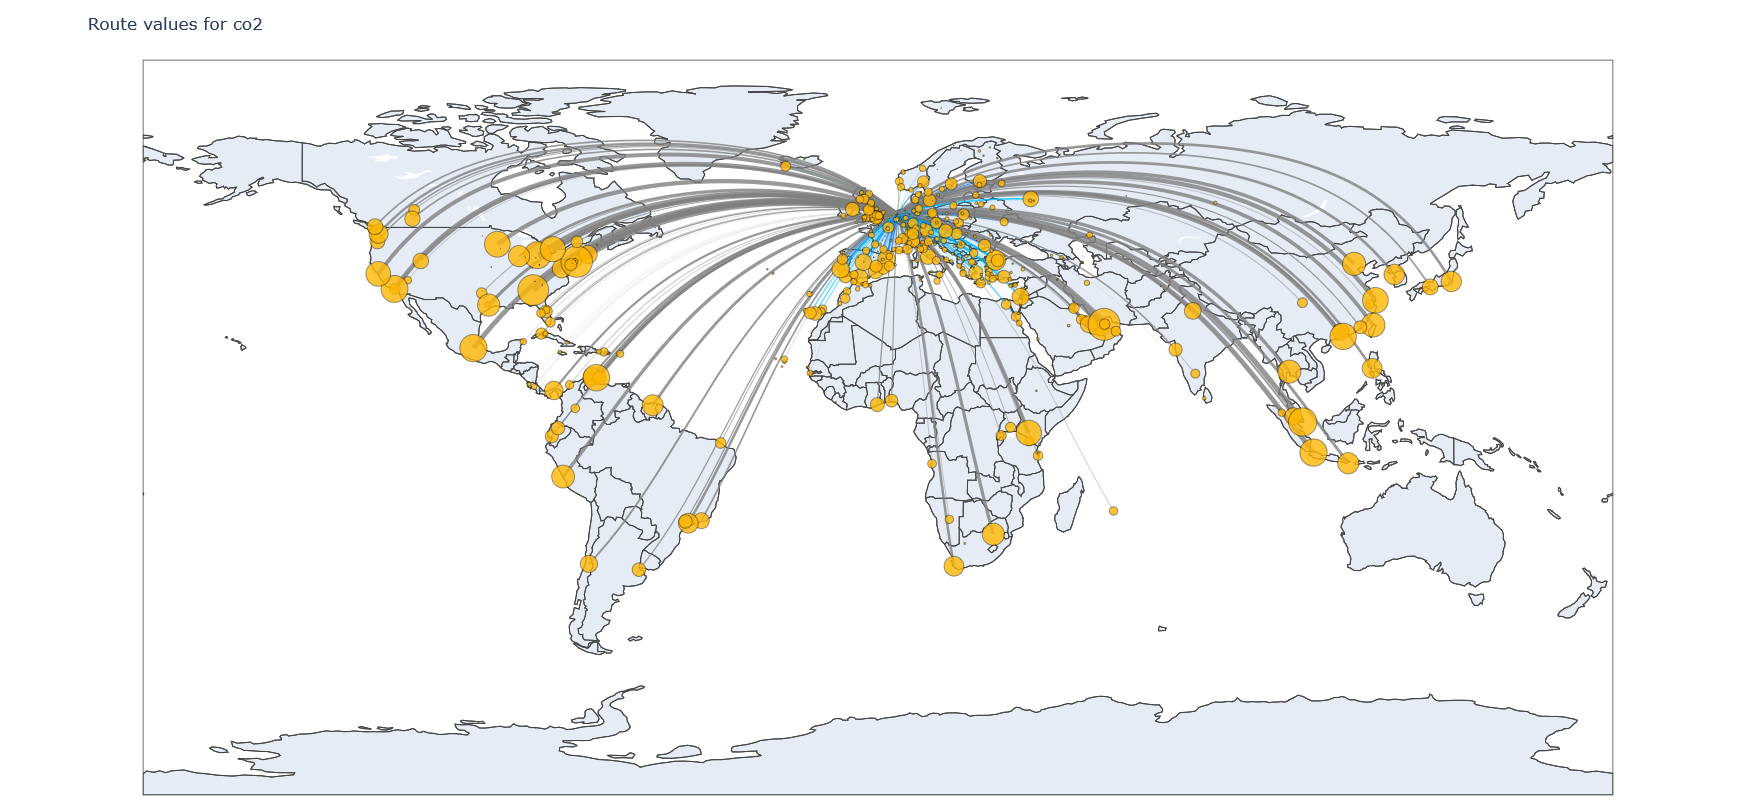

In [10]:



flights_NL_g_top['color']='gray'


def color_picker(d):
    d=d/1.852
    if d<500:
        color='#568203'
        # color=f'rgba(0,0,0,0)'
    elif 500<=d<1000:
        color='#007FFF'
        # color=f'rgba(0,0,0,0)'
    elif 1000<=d<2000:
        color='#00BFFF'
        # color=f'rgba(0,0,0,0)'
    else:
        color='gray'
        # color=f'rgba(0,0,0,0)'
    return color
    

flights_NL_g_top['color']=flights_NL_g_top.apply(lambda x: color_picker(x['distance_km']), axis=1)




value_watched_flights='co2'
flights_gpb_df=flights_NL_g_top

# Create the scattergeo figure
fig = go.Figure()

meanwidth = flights_gpb_df[value_watched_flights].mean()

for i in range(len(flights_gpb_df)):
    fig.add_trace(
        go.Scattergeo(
            lon=[flights_gpb_df['departure_lon'][i], flights_gpb_df['arrival_lon'][i]],
            lat=[flights_gpb_df['departure_lat'][i], flights_gpb_df['arrival_lat'][i]],
            mode='lines',
            line=dict(width=flights_gpb_df[value_watched_flights][i] / (3*meanwidth), color=flights_gpb_df['color'][i]),
            opacity=0.8
        )
    )

# group by airport

airport_df = flights_gpb_df.groupby('iata_arrival').agg({
    'co2': 'sum',
    'ask': 'sum',
    'seats': 'sum',
    'arrival_lon': 'first',
    'arrival_lat': 'first'}).reset_index()

fig.add_trace(go.Scattergeo(
    lon=airport_df['arrival_lon'],
    lat=airport_df['arrival_lat'],
    hoverinfo='text',
    text=airport_df[value_watched_flights],
    mode='markers',
    marker=dict(
        size=airport_df[value_watched_flights] / (.07 * fl_g[value_watched_flights].mean()),
        color='#ffb703',
        sizemode='area',
        opacity=0.8,
        line=dict(width=0.5, color='black'),
    ),
    customdata=airport_df['iata_arrival'],
    hovertemplate="Flights to: " + "%{customdata}<br>" +
                  value_watched_flights + ": %{text:.0f}<br>" +
                  "<extra></extra>",

))


fig.update_geos(showcountries=True)
fig.update_layout(showlegend=False, height=800, title='Route values for {}'.format(value_watched_flights))
fig.update_layout(margin=dict(l=5, r=5, t=60, b=5))  # Adjust layout margins and padding


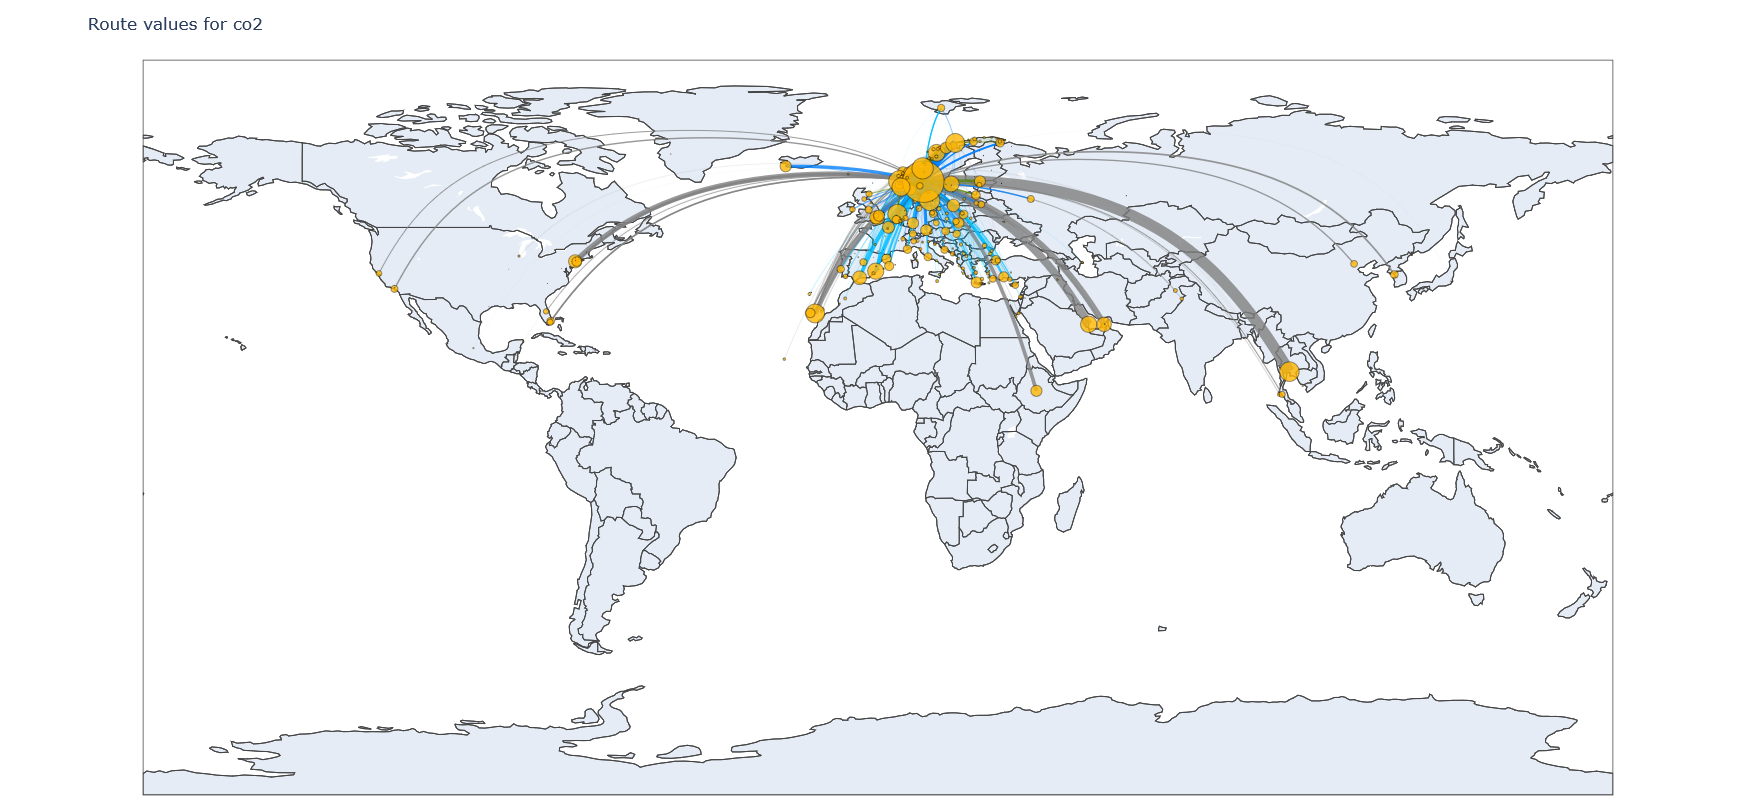

In [11]:


flights_NO_g_top['color']='gray'


def color_picker(d):
    d=d/1.852
    if d<500:
        color='#568203'
        # color=f'rgba(0,0,0,0)'
    elif 500<=d<1000:
        color='#007FFF'
        # color=f'rgba(0,0,0,0)'
    elif 1000<=d<2000:
        color='#00BFFF'
        # color=f'rgba(0,0,0,0)'
    else:
        color='gray'
        # color=f'rgba(0,0,0,0)'
    return color
    

flights_NO_g_top['color']=flights_NO_g_top.apply(lambda x: color_picker(x['distance_km']), axis=1)




value_watched_flights='co2'
flights_gpb_df=flights_NO_g_top

# Create the scattergeo figure
fig = go.Figure()

meanwidth = flights_gpb_df[value_watched_flights].mean()

for i in range(len(flights_gpb_df)):
    fig.add_trace(
        go.Scattergeo(
            lon=[flights_gpb_df['departure_lon'][i], flights_gpb_df['arrival_lon'][i]],
            lat=[flights_gpb_df['departure_lat'][i], flights_gpb_df['arrival_lat'][i]],
            mode='lines',
            line=dict(width=flights_gpb_df[value_watched_flights][i] / (3*meanwidth), color=flights_gpb_df['color'][i]),
            opacity=0.8
        )
    )

# group by airport

airport_df = flights_gpb_df.groupby('iata_arrival').agg({
    'co2': 'sum',
    'ask': 'sum',
    'seats': 'sum',
    'arrival_lon': 'first',
    'arrival_lat': 'first'}).reset_index()

fig.add_trace(go.Scattergeo(
    lon=airport_df['arrival_lon'],
    lat=airport_df['arrival_lat'],
    hoverinfo='text',
    text=airport_df[value_watched_flights],
    mode='markers',
    marker=dict(
        size=airport_df[value_watched_flights] / (.07 * fl_g[value_watched_flights].mean()),
        color='#ffb703',
        sizemode='area',
        opacity=0.8,
        line=dict(width=0.5, color='black'),
    ),
    customdata=airport_df['iata_arrival'],
    hovertemplate="Flights to: " + "%{customdata}<br>" +
                  value_watched_flights + ": %{text:.0f}<br>" +
                  "<extra></extra>",

))


fig.update_geos(showcountries=True)
fig.update_layout(showlegend=False, height=800, title='Route values for {}'.format(value_watched_flights))
fig.update_layout(margin=dict(l=5, r=5, t=60, b=5))  # Adjust layout margins and padding

Trying a naive approach to select n airports to maximize the percentage of flights of each type covered.

In [12]:
flights_df_gp= flights_df.groupby(['iata_departure','iata_arrival']).agg({
    'co2': 'sum',
    'ask': 'sum',
    'seats': 'sum',
    'arrival_lon': 'first',
    'arrival_lat': 'first',
    'departure_lon': 'first',
    'departure_lat': 'first',
    
'distance_km': 'first'}).reset_index()


flights_df_gp_elec=flights_df_gp[flights_df_gp.distance_km<500*1.852]

flights_df_gp_h2=flights_df_gp[(flights_df_gp.distance_km>=500*1.852) & (flights_df_gp.distance_km<1000*1.852)]

flights_df_gp_h2_bis=flights_df_gp[(flights_df_gp.distance_km>=500*1.852) & (flights_df_gp.distance_km<2000*1.852)]

In [13]:
print('Number of OD pairs overall: {}'.format(len(flights_df_gp)))
print('Number of OD pairs OK for battery elec: {}'.format(len(flights_df_gp_h2)))
print('Number of OD pairs OK for hydrogen 1000NM: {}'.format(len(flights_df_gp_elec)))
print('Number of OD pairs OK for hydrogen 2000NM: {}'.format(len(flights_df_gp_h2_bis)))

Number of OD pairs overall: 118226
Number of OD pairs OK for battery elec: 33494
Number of OD pairs OK for hydrogen 1000NM: 45028
Number of OD pairs OK for hydrogen 2000NM: 58820


In [14]:
flights_df_gp_elec

score=[]
x=[]

for i in range (0, 33494, 500):
    x.append(i)
    score.append(flights_df_gp_elec.sort_values(by='co2').nlargest(i,columns='co2')['co2'].sum()/flights_df_gp_elec['co2'].sum())
    
    
fig = plt.plot(x,score)

plt.xlabel('Number of largest routes considered')
plt.ylabel('Fraction of electric aircraft potential covered')

# Show the plot
plt.show()

    
flights_df_gp_elec_top=flights_df_gp_elec.sort_values(by='co2').nlargest(5000,columns='co2').reset_index()

C:\Users\a.salgas.ISAE-SUPAERO\AppData\Local\Temp\ipykernel_18220\704481961.py:17: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



As we can see, 80% of the emissions potentially covered by the electric aircraft are in the 5000/33494 first flights. It is therefore relatively concentrated.  
The next step is to see if the largest airports cover much of these emissions.

In [15]:
from tqdm import tqdm

def is_in_top(ap, top):
    if ap in top:
        return 1
    else:
        
        return 0

score_0=[]
n_airport=[]

for i in tqdm(range(0,len(flights_df_gp_elec['iata_departure'].unique()),100)):
    top_elec=flights_df_gp_elec.groupby('iata_departure')['co2'].sum().nlargest(i).index.to_list()
    
    flights_df_gp_elec_copy = flights_df_gp_elec.copy()
    flights_df_gp_elec_copy.loc[:, 'top_departure'] = flights_df_gp_elec_copy.apply(lambda x: is_in_top(x['iata_departure'], top_elec),axis=1)
    flights_df_gp_elec_copy.loc[:, 'top_arrival'] = flights_df_gp_elec_copy.apply(lambda x: is_in_top(x['iata_arrival'], top_elec),axis=1)
    n_airport.append(i)
    score_0.append(flights_df_gp_elec_copy[(flights_df_gp_elec_copy.top_arrival==1)&(flights_df_gp_elec_copy.top_departure==1)]['co2'].sum()/flights_df_gp_elec_copy['co2'].sum())
    
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [01:33<00:00,  2.07s/it]


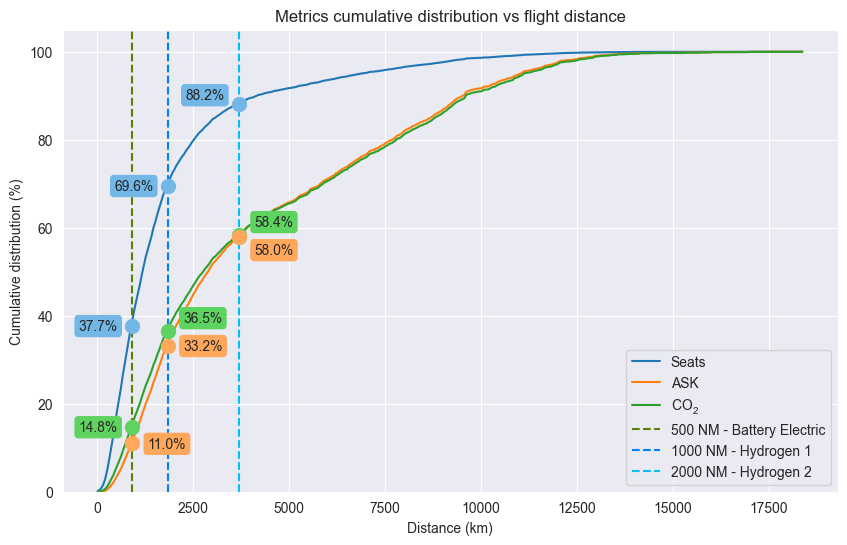

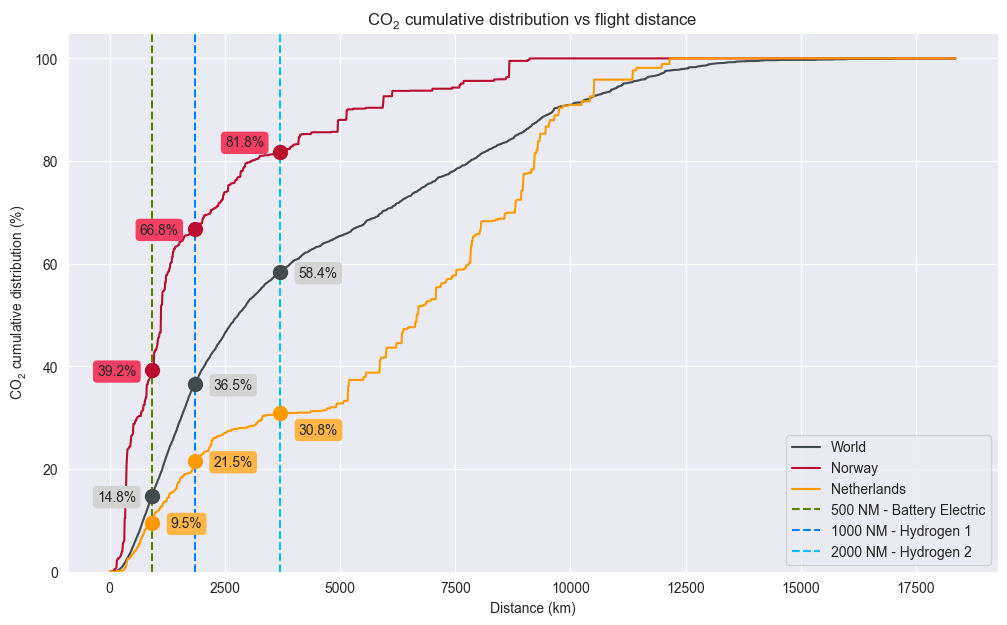

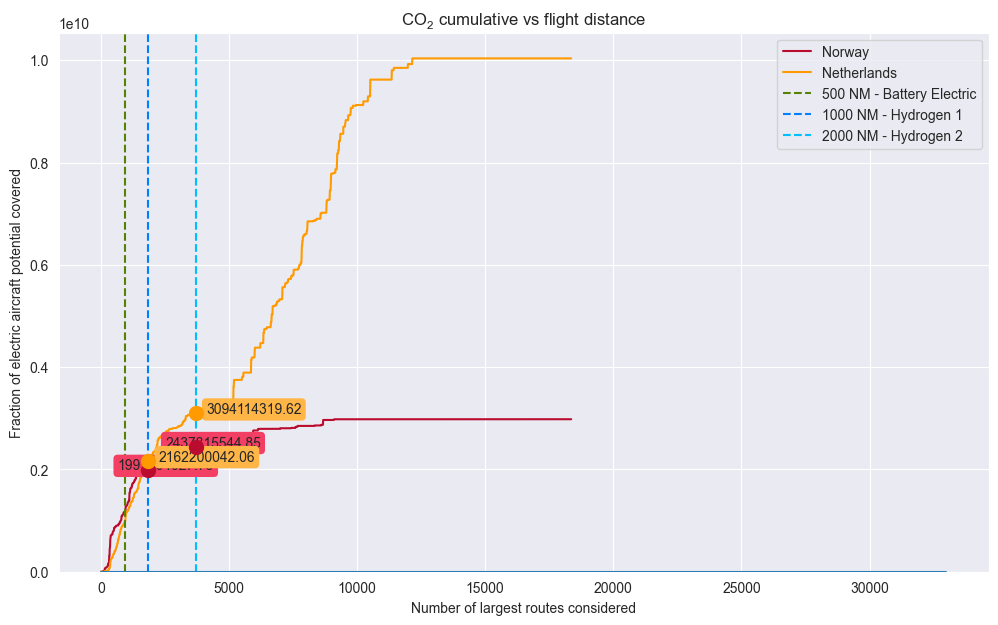

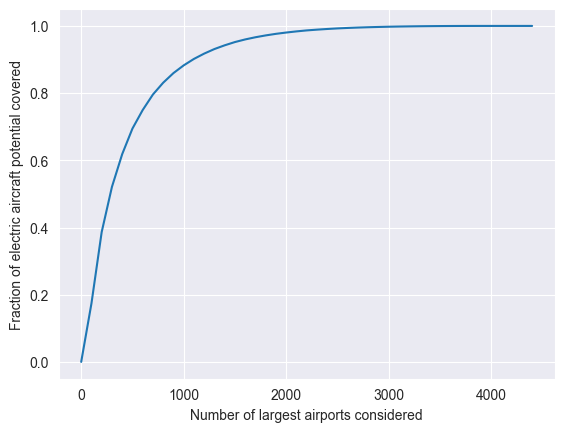

In [16]:
%matplotlib inline
# Plotting
fig, ax= plt.subplots()

ax.plot(n_airport,score_0)

ax.set_xlabel('Number of largest airports considered')
ax.set_ylabel('Fraction of electric aircraft potential covered')

# Show the plot
plt.show()
fig.savefig('naive.pdf')


As it can be seen on the plot above, flights between two of the 500 largest airports (over 4411) cover around 70 % of the emissions potentially adressed by an electric aircraft.   
That is confirmed below.

In [17]:
top500_elec=flights_df_gp_elec.groupby('iata_departure')['co2'].sum().nlargest(500).index.to_list()

flights_df_gp_elec_copy = flights_df_gp_elec.copy()
flights_df_gp_elec_copy['top_departure'] = flights_df_gp_elec_copy.apply(lambda x: is_in_top(x['iata_departure'], top500_elec),axis=1)
flights_df_gp_elec_copy['top_arrival'] = flights_df_gp_elec_copy.apply(lambda x: is_in_top(x['iata_arrival'], top500_elec),axis=1)

testo=flights_df_gp_elec_copy[(flights_df_gp_elec_copy.top_arrival==1)&(flights_df_gp_elec_copy.top_departure==1)].reset_index()
flights_df_gp_elec_copy[(flights_df_gp_elec_copy.top_arrival==1)&(flights_df_gp_elec_copy.top_departure==1)]['co2'].sum()/flights_df_gp_elec_copy['co2'].sum()

0.694468777452973

Next, we try to select these 500 airports a bit differently to potentially increase this share.  
We still consider the largest airports as before, but we also select the n airports with the most emissive routes around the major airports. (but they are counted in the "500 airports", so the number of "largest airports" decraeses).  
The idea behind this is to create local "battery electric" networks rather tahn isolated airport pairs.

In [18]:
def smart_top(top, df, nmax,j):
    i=0
    count=0
    while count<nmax:
        ap=top[i]
        top_list.append(ap)
        count+=1
        destinations=df[df.iata_departure==ap].groupby('iata_arrival')['co2'].sum().nlargest(j).index.to_list()
        for el in destinations:
            if el not in top_list:
                top_list.append(el)
                count+=1
        i+=1
    return top_list



score={}
for arpt in [100,500,1000,2000]:
    score_i=[]
    
    top_elec=flights_df_gp_elec.groupby('iata_departure')['co2'].sum().nlargest(arpt).index.to_list()
    for j in tqdm(range (0,30)):
        top_list=[]
        top_list=smart_top(top_elec, flights_df_gp_elec.reset_index(), arpt, j)

        flights_df_gp_elec_copy = flights_df_gp_elec.copy()

        flights_df_gp_elec_copy['top_departure'] = flights_df_gp_elec_copy.apply(lambda x: is_in_top(x['iata_departure'], top_list),axis=1)
        flights_df_gp_elec_copy['top_arrival'] = flights_df_gp_elec_copy.apply(lambda x: is_in_top(x['iata_arrival'], top_list),axis=1)

        testo=flights_df_gp_elec_copy[(flights_df_gp_elec_copy.top_arrival==1)&(flights_df_gp_elec_copy.top_departure==1)].reset_index()
        score_i.append(flights_df_gp_elec_copy[(flights_df_gp_elec_copy.top_arrival==1)&(flights_df_gp_elec_copy.top_departure==1)]['co2'].sum()/flights_df_gp_elec_copy['co2'].sum())
    score[arpt]=score_i
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:29<00:00,  4.97s/it]


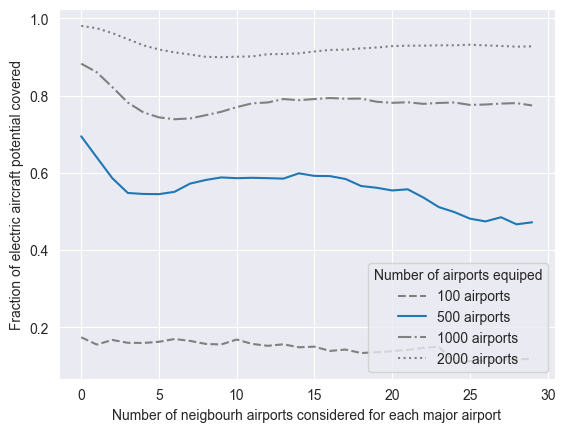

In [19]:
%matplotlib inline
# Plotting
fig, ax = plt.subplots()

ax.plot(score[100], label='100 airports', color='grey', ls='--')
ax.plot(score[500], label='500 airports')
ax.plot(score[1000], label='1000 airports', color='grey',ls='-.')
ax.plot(score[2000], label='2000 airports', color='grey',ls=':')

ax.set_xlabel('Number of neigbourh airports considered for each major airport')
ax.set_ylabel('Fraction of electric aircraft potential covered')

ax.legend(title='Number of airports equiped',loc='lower right')
# Show the plot
plt.show()

fig.savefig('neighbour.pdf')

That is not conclusive. The best choice is still considering the largest airport.  
We are still able to see a "network effect" between 5 and 10 relations considered, but the farction of emissions covered is still 10% lower.
The trend is similar no matter how many airports are considered.

We try a last small improvement by following the same approach, but considering the routes only if they are in the top n routes, to avoid taking into account small airports served from big airports in the selection.

In [20]:
def smart_top2(top, df, df_routes_top, nmax, j):
    i=0
    count=0
    while count<nmax:
        ap=top[i]
        if ap not in top_list:
            top_list.append(ap)
            count+=1
        destinations=df_routes_top[df_routes_top.iata_departure==ap].groupby('iata_arrival')['co2'].sum().nlargest(j).index.to_list()
        for el in destinations:
            if el not in top_list:
                top_list.append(el)
                count+=1
        i+=1
    return top_list

score_2={}

for n_routes in [500,1500, 2500, 5000]:
    score_i=[]
    for j in tqdm(range (0,30)):
        top_list=[]

        top_elec=flights_df_gp_elec.groupby('iata_departure')['co2'].sum().nlargest(500).index.to_list()
        
        flights_df_gp_elec_top=flights_df_gp_elec.sort_values(by='co2').nlargest(n_routes, columns='co2').reset_index()      
        
        top_list=smart_top2(top_elec, flights_df_gp_elec.reset_index(), flights_df_gp_elec_top.reset_index(), 500, j)
        
        flights_df_gp_elec_copy = flights_df_gp_elec.copy()

        flights_df_gp_elec_copy['top_departure'] = flights_df_gp_elec_copy.apply(lambda x: is_in_top(x['iata_departure'], top_list),axis=1)
        flights_df_gp_elec_copy['top_arrival'] = flights_df_gp_elec_copy.apply(lambda x: is_in_top(x['iata_arrival'], top_list),axis=1)

        testo=flights_df_gp_elec_copy[(flights_df_gp_elec_copy.top_arrival==1)&(flights_df_gp_elec_copy.top_departure==1)].reset_index()
        score_i.append(flights_df_gp_elec_copy[(flights_df_gp_elec_copy.top_arrival==1)&(flights_df_gp_elec_copy.top_departure==1)]['co2'].sum()/flights_df_gp_elec_copy['co2'].sum())
    score_2[n_routes]=score_i

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:45<00:00,  1.51s/it]


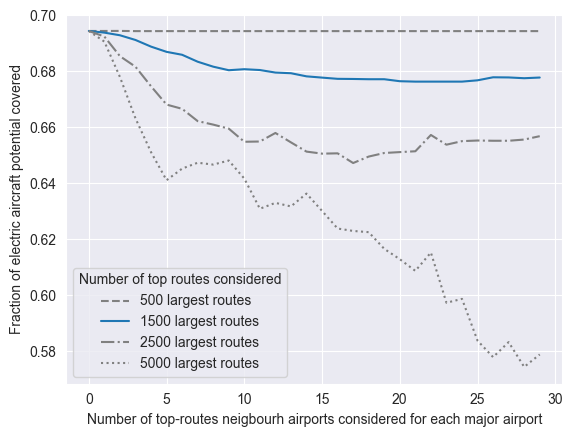

In [21]:
fig, ax = plt.subplots()

ax.plot(score_2[500], label='500 largest routes', color='grey', ls='--')
ax.plot(score_2[1500], label='1500 largest routes')
ax.plot(score_2[2500], label='2500 largest routes', color='grey',ls='-.')
ax.plot(score_2[5000], label='5000 largest routes', color='grey',ls=':')

ax.set_xlabel('Number of top-routes neigbourh airports considered for each major airport')
ax.set_ylabel('Fraction of electric aircraft potential covered')

ax.legend(title='Number of top routes considered',loc='lower left')
# Show the plot
plt.show()
fig.savefig('neigbours-top.pdf')

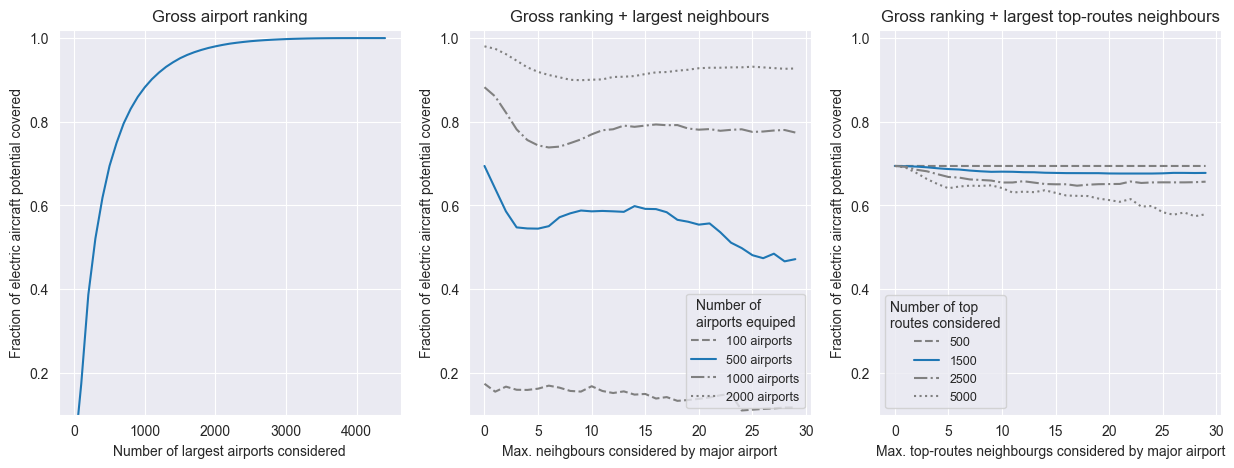

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot on each subplot
axs[0].plot(n_airport,score_0)

axs[0].set_xlabel('Number of largest airports considered')
axs[0].set_ylabel('Fraction of electric aircraft potential covered')

axs[0].set_ylim([0.1,1.02])

axs[0].set_title('Gross airport ranking')

axs[1].plot(score[100], label='100 airports', color='grey', ls='--')
axs[1].plot(score[500], label='500 airports')
axs[1].plot(score[1000], label='1000 airports', color='grey',ls='-.')
axs[1].plot(score[2000], label='2000 airports', color='grey',ls=':')

axs[1].set_xlabel('Max. neihgbours considered by major airport')
axs[1].set_ylabel('Fraction of electric aircraft potential covered')
axs[1].set_ylim([0.1,1.02])


axs[1].legend(title='Number of\nairports equiped', fontsize=9,loc='lower right')

axs[1].set_title('Gross ranking + largest neighbours')

axs[2].plot(score_2[500], label='500', color='grey', ls='--')
axs[2].plot(score_2[1500], label='1500')
axs[2].plot(score_2[2500], label='2500', color='grey',ls='-.')
axs[2].plot(score_2[5000], label='5000', color='grey',ls=':')

axs[2].set_xlabel('Max. top-routes neighbourgs considered by major airport')
axs[2].set_ylabel('Fraction of electric aircraft potential covered')

axs[2].set_ylim([0.1,1.02])

axs[2].legend(title='Number of top\nroutes considered',loc='lower left', fontsize=9)

axs[2].set_title('Gross ranking + largest top-routes neighbours')

fig.savefig('airport_optim.pdf', bbox_inches='tight')

In [23]:
# testo['color']='gray'


# def color_picker(d):
#     d=d/1.852
#     if d<500:
#         color='#568203'
#         # color=f'rgba(0,0,0,0)'
#     elif 500<=d<1000:
#         color='#007FFF'
#         # color=f'rgba(0,0,0,0)'
#     elif 1000<=d<2000:
#         color='#00BFFF'
#         # color=f'rgba(0,0,0,0)'
#     else:
#         color='gray'
#         # color=f'rgba(0,0,0,0)'
#     return color
    

# testo['color']=testo.apply(lambda x: color_picker(x['distance_km']), axis=1)




# value_watched_flights='co2'
# flights_gpb_df=testo

# # Create the scattergeo figure
# fig = go.Figure()

# meanwidth = flights_gpb_df[value_watched_flights].mean()

# for i in range(len(flights_gpb_df)):
#     fig.add_trace(
#         go.Scattergeo(
#             lon=[flights_gpb_df['departure_lon'][i], flights_gpb_df['arrival_lon'][i]],
#             lat=[flights_gpb_df['departure_lat'][i], flights_gpb_df['arrival_lat'][i]],
#             mode='lines',
#             line=dict(width=flights_gpb_df[value_watched_flights][i] / (3*meanwidth), color=flights_gpb_df['color'][i]),
#             opacity=0.8
#         )
#     )

# # group by airport

# airport_df = flights_gpb_df.groupby('iata_arrival').agg({
#     'co2': 'sum',
#     'ask': 'sum',
#     'seats': 'sum',
#     'arrival_lon': 'first',
#     'arrival_lat': 'first'}).reset_index()

# fig.add_trace(go.Scattergeo(
#     lon=airport_df['arrival_lon'],
#     lat=airport_df['arrival_lat'],
#     hoverinfo='text',
#     text=airport_df[value_watched_flights],
#     mode='markers',
#     marker=dict(
#         size=airport_df[value_watched_flights] / (.07 * fl_g[value_watched_flights].mean()),
#         color='#ffb703',
#         sizemode='area',
#         opacity=0.8,
#         line=dict(width=0.5, color='black'),
#     ),
#     customdata=airport_df['iata_arrival'],
#     hovertemplate="Flights to: " + "%{customdata}<br>" +
#                   value_watched_flights + ": %{text:.0f}<br>" +
#                   "<extra></extra>",

# ))


# fig.update_geos(showcountries=True)
# fig.update_layout(showlegend=False, height=800, title='Route values for {}'.format(value_watched_flights))
# fig.update_layout(margin=dict(l=5, r=5, t=60, b=5))  # Adjust layout margins and padding

# 2- RPK/inhabitant and inequal traffic repartition

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    median_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)


In [55]:
##### DEV ZONE ######
world_bank_data= pd.read_csv('data/world_bank_data.csv', sep=';')
countries_fixed_test = country_fixed.merge(world_bank_data, left_on='departure_ISO3', right_on='Country Code', how='left').drop(columns={'Country Name','Country Code'})
countries_fixed_test = countries_fixed_test.dropna(subset=['GDP PPP','population'])
# countries_fixed_test = countries_fixed_test.dropna(subset=['GDP PPP','toursim_export_share','population'])

countries_fixed_sep_dom_test = country_fixed_sep_dom.merge(world_bank_data, left_on='departure_ISO3', right_on='Country Code', how='left').drop(columns={'Country Name','Country Code'})
countries_fixed_sep_dom_test = countries_fixed_sep_dom_test.dropna(subset=['GDP PPP','Surf','toursim_export_share','population'])


Let's begin by calculating the Gini coefficients

In [101]:
def calculate_gini(X, Y):
    n = len(X)

    if any(Y[a] < Y[a - 1] for a in range(1, n)):
        raise ValueError("Y should be in non-decreasing order.")

    # using brown formulae to calculate Gini  coefficient: https://fr.wikipedia.org/wiki/Coefficient_de_Gini
    gini = 1 - sum((X[k] - X[k - 1]) * (Y[k] + Y[k - 1]) for k in range(1, n))
    
    return gini

In [102]:
## Gossling article

X=[0,0.89,0.99,1]
Y=[0,0,0.50,1]

calculate_gini(X,Y)

0.935

Gini Coefficient for ASK: 0.6524
Gini Coefficient for Seats: 0.6064
Gini Coefficient for wealth: 0.4674
Gini Coefficient for wealth: 0.9350


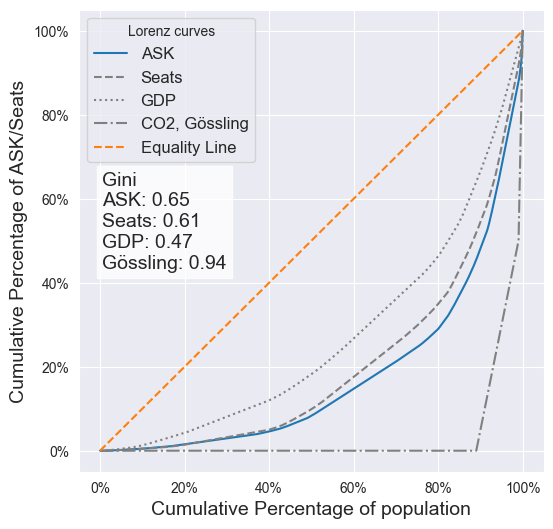

In [104]:
from matplotlib.ticker import FuncFormatter

df=countries_fixed_test.copy()


################## ASK INEQUALITIES' ********************

df['ask_ppop']=df['ask']/df['population']
df = df.sort_values(by='ask_ppop')

# Calculate cumulative percentages
df['population Cumulative'] = df['population'].cumsum() / df['population'].sum()
df['ask Cumulative'] = df['ask'].cumsum() / df['ask'].sum()

gini_coefficient_ask = calculate_gini(df['population Cumulative'].to_list(), df['ask Cumulative'].to_list())

print(f"Gini Coefficient for ASK: {gini_coefficient_ask:.4f}")

# Plot Lorenz curve
fig,ax = plt.subplots(figsize=(6, 6))
ax.plot(df['population Cumulative'], df['ask Cumulative'], linestyle='-')


################## SEATS INEQUALITIES' ********************

df['seats_ppop']=df['seats']/df['population']
df = df.sort_values(by='seats_ppop')

# Calculate cumulative percentages
df['population Cumulative'] = df['population'].cumsum() / df['population'].sum()
df['seats Cumulative'] = df['seats'].cumsum() / df['seats'].sum()

gini_coefficient_seats = calculate_gini(df['population Cumulative'].to_list(), df['seats Cumulative'].to_list())
print(f"Gini Coefficient for Seats: {gini_coefficient_seats:.4f}")

# Plot Lorenz curve
ax.plot(df['population Cumulative'], df['seats Cumulative'], linestyle='--', color='grey')

################## WEAlTH INEQUALITIES' ********************

df['GDP TOT']=df['GDP PPP']*df['population']
df = df.sort_values(by='GDP PPP')

# Calculate cumulative percentages
df['population Cumulative'] = df['population'].cumsum() / df['population'].sum()
df['GDP Cumulative'] = df['GDP TOT'].cumsum() / df['GDP TOT'].sum()

gini_coefficient_wealth = calculate_gini(df['population Cumulative'].to_list(), df['GDP Cumulative'].to_list())
print(f"Gini Coefficient for wealth: {gini_coefficient_wealth:.4f}")

# Plot Lorenz curve
ax.plot(df['population Cumulative'], df['GDP Cumulative'], linestyle=':', color='grey')


################## GÖSSLING INEQUALITIES' ********************

gini_coefficient_goSs = calculate_gini(X,Y)
print(f"Gini Coefficient for wealth: {gini_coefficient_goSs:.4f}")

# Plot Lorenz curve
ax.plot(X,Y, linestyle='-.', color='grey')

ax.plot([0, 1], [0, 1], linestyle='--')  # 45-degree line for reference


text = f'Gini\nASK: {gini_coefficient_ask:.2f}\nSeats: {gini_coefficient_seats:.2f}\nGDP: {gini_coefficient_wealth:.2f}\nGössling: {gini_coefficient_goSs:.2f}'
ax.annotate(text, xy=(0.05, 0.65), xycoords='axes fraction', bbox=dict(facecolor='white', alpha=0.8),
             fontsize=14, ha='left', va='top')


ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

ax.set_xlabel('Cumulative Percentage of population', fontsize=14)
ax.set_ylabel('Cumulative Percentage of ASK/Seats', fontsize=14)
ax.legend(['ASK','Seats','GDP','CO2, Gössling','Equality Line'],title='Lorenz curves', loc='upper left', fontsize=12)
ax.grid(True)

plt.savefig('gini.pdf', bbox_inches='tight')
plt.show()

0.837995035717394
[0.00000000e+00 2.47113570e-05 3.69900218e-10]


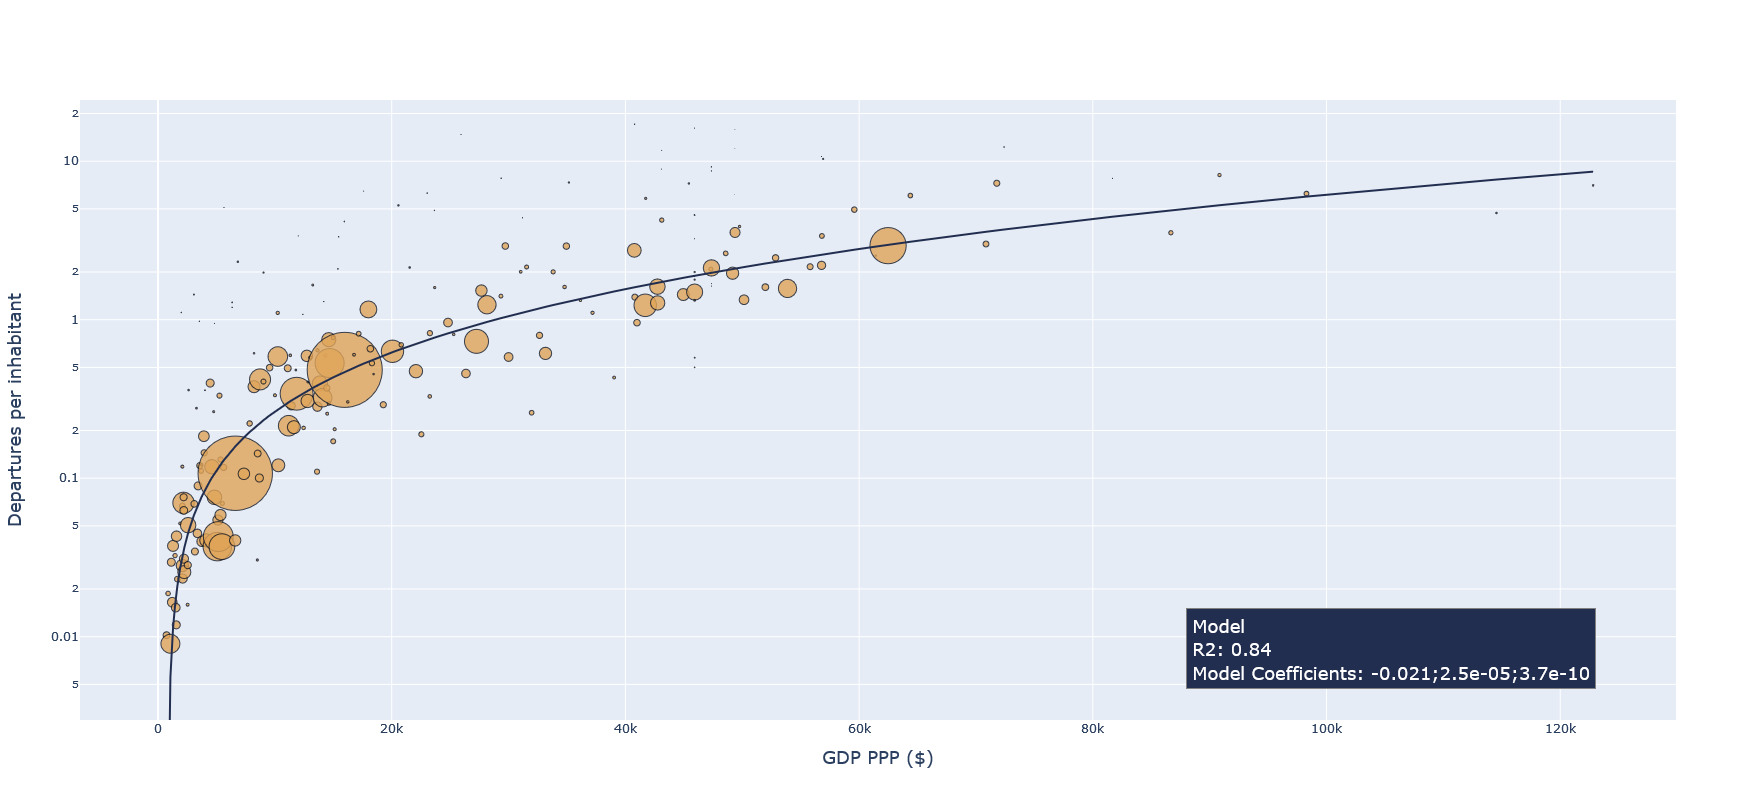

In [146]:
### Polynomial regression

load_factor=0.83

X = countries_fixed_test[['GDP PPP']].copy()
y = (countries_fixed_test['seats']*load_factor)/countries_fixed_test['population']

##### Polynomial #####
w=countries_fixed_test['population']


# # Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# # Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y, sample_weight=w)

# Generate predictions
y_pred = model.predict(X_poly)



df_viz = pd.concat([X,countries_fixed_test[['departure_country_name', 'population']], y], axis=1).rename(columns={0:'y'})
df_viz['y_pred']=y_pred


df_viz=df_viz.sort_values(by='GDP PPP')

fig = go.Figure()

# Add a scatter plot
fig.add_trace(go.Scatter(
    x=df_viz['GDP PPP'],
    y=df_viz['y'],
    mode='markers',
    marker=dict(
        size=0.000002*df_viz['population'],
        opacity=0.8 , # Set the marker opacity,
        sizemode='area', 
        color="#E0A458",
        line=dict(color='#0c111d'),
    ),
    text=df_viz['departure_country_name'],
    # name='Data'
))
# fig= go.Figure()



fig.add_trace(go.Scatter(
    y=df_viz['y_pred'].values,
    x=df_viz['GDP PPP'].values,
    opacity=1,
    line=dict(color='#222E50'),
    # name='Regression'
))


fig.update_layout(
    height=800,
        xaxis_title='GDP PPP ($)',
        yaxis_title='Departures per inhabitant',
        yaxis_type='log',
    width=1400,
    xaxis_title_font=dict(size=18),  
    yaxis_title_font=dict(size=18),
    showlegend=False
    
)

fig.update_yaxes(range=[np.log(0.08), np.log(4)])

r2 = r2_score(y, y_pred, sample_weight=w)

fig.add_annotation(
    text=f'Model<br>R2: {r2:.2f}<br>Model Coefficients: {model.intercept_:.2};{model.coef_[1]:.2};{model.coef_[2]:.2}',
    showarrow=False,
    xref='paper',
    yref='paper',
    x=0.95,
    y=0.05,
    font=dict(size=18, color='white'),  # Text style
    align='left',
    bgcolor='rgb(34, 46, 80, 0.25)',  # Box background color
    bordercolor='gray',  # Box border color
    borderwidth=1,  # Box border width
    borderpad=4,
)


print(r2)
print(model.coef_)
fig.write_image('GDP_regression.pdf', format='pdf')
fig

In [ ]:
country_int

In [ ]:
### Multipolynomial regression by adding the toursim export share
# ==> very limited improvement of the fit



X = countries_fixed_test[['GDP PPP', 'toursim_export_share']].copy()
y = (countries_fixed_test['seats']/countries_fixed_test['population'])

##### Polynomial #####
w=countries_fixed_test['population']


# # Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# # Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y, sample_weight=w)

# Generate predictions
y_pred = model.predict(X_poly)



df_viz = pd.concat([X,countries_fixed_test[['departure_country_name', 'population']], y], axis=1).rename(columns={0:'y'})
df_viz['y_pred']=y_pred


df_viz=df_viz.sort_values(by='GDP PPP')

fig = go.Figure()

# Add a scatter plot
fig.add_trace(go.Scatter3d(
    x=df_viz['GDP PPP'],
    y=df_viz['toursim_export_share'],
    z=df_viz['y'],
    mode='markers',
    marker=dict(
        size=0.000005*df_viz['population'],
        opacity=0.8,  # Set the marker opacity
        sizemode='area',
    ),
    text=df_viz['departure_country_name'],
))
# fig= go.Figure()



fig.add_trace(go.Mesh3d(
    z=df_viz['y_pred'].values,
    intensity=df_viz['y_pred'].values,
    x=df_viz['GDP PPP'].values,
    y=df_viz['toursim_export_share'].values,
    opacity=0.5,
    colorbar_title='z',
        colorscale=[[0, 'gold'],
                    [0.5, 'mediumturquoise'],
                    [1, 'magenta']],
    
    # log_y=True, 
    # mode='lines',
))


fig.update_layout(
    height=1200,
    scene=dict(
        xaxis_title='GDP PPP',
        yaxis_title='Tourism Export Share',
        zaxis_title='Departing flights per inhabitant',
        # zaxis_type='log'
    )
)


r2 = r2_score(y, y_pred, sample_weight=w)
print(r2)
print(model.coef_)
fig

In [ ]:
### Polynomial regression


country_dom=countries_fixed_sep_dom_test[countries_fixed_sep_dom_test['domestic']==1 ].copy()
country_dom=country_dom[country_dom['seats']/country_dom['population']>0.00]


X = country_dom[['GDP PPP']].copy()
y = (country_dom['seats']/country_dom['population'])

##### Polynomial #####
w=country_dom['population']


# # Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# # Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y, sample_weight=w)

# Generate predictions
y_pred = model.predict(X_poly)



df_viz = pd.concat([X,country_dom[['departure_country_name', 'population', 'seats']], y], axis=1).rename(columns={0:'y'})
df_viz['y_pred']=y_pred


df_viz=df_viz.sort_values(by='GDP PPP')

fig = go.Figure()

# Add a scatter plot
fig.add_trace(go.Scatter(
    x=df_viz['GDP PPP'],
    y=df_viz['y'],
    mode='markers',
    marker=dict(
        size=0.000005*df_viz['seats'],
        opacity=0.8 , # Set the marker opacity,
        color='rgb(255, 153, 85)',
        sizemode='area',
        line=dict(color='#3D1800')
    ),
    text=df_viz['departure_country_name'],
    name='Domestic: data'
))
# fig= go.Figure()



fig.add_trace(go.Scatter(
    y=df_viz['y_pred'].values,
    x=df_viz['GDP PPP'].values,
    opacity=1,
    line=dict(color='rgb(255, 153, 85)'),
    name='Domestic: regression'
))


r2 = r2_score(y, y_pred, sample_weight=w)


fig.add_annotation(
    text=f'Domestic model<br>R2: {r2:.2f}<br>Model Coefficients: {model.intercept_:.2};{model.coef_}',
    showarrow=False,
    xref='paper',
    yref='paper',
    x=0.95,
    y=0.15,
    font=dict(size=12, color='white'),  # Text style
    align='left',
    bgcolor='rgb(255, 153, 85, 0.25)',  # Box background color
    bordercolor='gray',  # Box border color
    borderwidth=1,  # Box border width
    borderpad=4,
)

##################### DOMESTIC #########################################
country_int=countries_fixed_sep_dom_test[countries_fixed_sep_dom_test['domestic']==0].copy()
country_int=country_int[country_int['seats']/country_int['population']>0.00]


### Polynomial regression

X = country_int[['GDP PPP']].copy()
y = (country_int['seats']/country_int['population'])

##### Polynomial #####
w=country_int['population']


# # Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# # Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y, sample_weight=w)

# Generate predictions
y_pred = model.predict(X_poly)



df_viz = pd.concat([X,country_int[['departure_country_name', 'population', 'seats']], y], axis=1).rename(columns={0:'y'})
df_viz['y_pred']=y_pred


df_viz=df_viz.sort_values(by='GDP PPP')


# Add a scatter plot
fig.add_trace(go.Scatter(
    x=df_viz['GDP PPP'],
    y=df_viz['y'],
    mode='markers',
    marker=dict(
        size=0.000005*df_viz['seats'],
        opacity=0.8 , # Set the marker opacity,
        sizemode='area',
        color='rgb(123, 169, 188)', 
        line=dict(color='#1B2E36')
    ),
    text=df_viz['departure_country_name'],
    name='International: data'
))
# fig= go.Figure()



fig.add_trace(go.Scatter(
    y=df_viz['y_pred'].values,
    x=df_viz['GDP PPP'].values,
    opacity=1,
    line=dict(color='rgb(123, 169, 188)'),
    name='International: regression'
))


fig.update_layout(
    height=800,
        xaxis_title='GDP PPP',
        yaxis_title='Departing flights per inhabitant',
        yaxis_type='log',
        # yaxis=dict(range=[1, None])
    
)

r2 = r2_score(y, y_pred, sample_weight=w)

fig.add_annotation(
    text=f'International model<br>R2: {r2:.2f}<br>Model Coefficients: {model.intercept_:.2};{model.coef_}',
    showarrow=False,
    xref='paper',
    yref='paper',
    x=0.95,
    y=0.05,
    font=dict(size=12, color='white'),  # Text style
    align='left',
    bgcolor='rgb(123, 169, 188, 0.25)',  # Box background color
    bordercolor='gray',  # Box border color
    borderwidth=1,  # Box border width
    borderpad=4,
)

fig

In [ ]:
countries_fixed_test = country_fixed.merge(world_bank_data, left_on='departure_ISO3', right_on='Country Code', how='left').drop(columns={'Country Name','Country Code'})
# countries_fixed_test = countries_fixed_test.dropna(subset=['population'])

In [ ]:
countries_fixed_test[countries_fixed_test.population.isna()]['departure_ISO3']

In [ ]:
countries_fixed_test['seathab']=countries_fixed_test['seats']/countries_fixed_test['population']

import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Join the data frame with the shapefile
gdf = world.merge(countries_fixed_test, left_on='iso_a3', right_on='departure_ISO3')
gdf.head()

###ASK 


# Create a new dataframe for countries not present in gdf
countries_not_in_gdf = countries_fixed_test[~countries_fixed_test['departure_ISO3'].isin(gdf['iso_a3'])]


# Choropleth map
fig = px.choropleth_mapbox(
    gdf,
    geojson=gdf.geometry,
    locations=gdf.index,
    mapbox_style='carto-positron',
    color_continuous_scale=px.colors.diverging.RdYlBu,
    custom_data=[gdf['name'], gdf['seathab']],  # Add custom data for hover
    range_color=[0.1, 5],
    color='seathab',
    height=700
)

hover_template_choropleth = '%{customdata[0]}<br>Seathab: %{customdata[1]:.2f}<extra></extra>'
fig.update_traces(hovertemplate=hover_template_choropleth)

# Scatter map for countries not present in gdf
fig.add_trace(go.Scattermapbox(
    lat=countries_not_in_gdf['departure_lat'],  # Use the appropriate column name for latitude
    lon=countries_not_in_gdf['departure_lon'],  # Use the appropriate column name for longitude
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=9,
        color=countries_not_in_gdf['seathab'],
        colorscale=px.colors.diverging.RdYlBu,
        cmin=0.1,
        cmax=5, 
    ),
    hoverinfo='text',  # Specify hover info
    hovertext=countries_not_in_gdf['departure_country_name'] + '<br>Seathab: ' + countries_not_in_gdf['seathab'].astype(str)
))

# Update layout for a better display
fig.update_layout(
    mapbox=dict(center=dict(lat=10, lon=15), zoom=1.3),
    margin=dict(r=0, l=0, b=0, t=0),
    coloraxis_colorbar=dict(
                 title='Departing<br>passengers/hab',
                    title_font=dict(size=16, color='black'),
                 len=0.8, x=0.02)
)

# 
fig.update_geos(fitbounds="locations", visible=True)

fig.show()

# fig.write_image("countries_ask.pdf", width=1600)

In [ ]:
countries_fixed_test.seats.sum()/countries_fixed_test.population.sum()
countries_fixed_test['homogeneous_seathab']=countries_fixed_test.seats.sum()/countries_fixed_test.population.sum()

In [ ]:
countries_fixed_test['homogeneous_seats']=countries_fixed_test.population*countries_fixed_test.seats.sum()/countries_fixed_test.population.sum()

In [ ]:
countries_fixed_test['seats'].mean()

In [ ]:
countries_fixed_test = countries_fixed_test.dropna(subset=['population'])
fig = go.Figure()


fig.add_trace(go.Scattergeo(
    lon=countries_fixed_test['departure_lon'],
    lat=countries_fixed_test['departure_lat'],
    hoverinfo='text',
    text=countries_fixed_test['seats'],
    mode='markers',
    marker=dict(
        size=countries_fixed_test['seats'] / (.02 * countries_fixed_test['seats'].mean()),
        sizemode='area',
        color='rgb(238,155,0)',
        line=dict(width=0, color='black'), opacity=1
    ),
    customdata=countries_fixed_test[['departure_country_name']],
    hovertemplate="Total departures from: %{customdata[0]}<br>" +
                  'seats' + ": %{text:.0f}<br>" +
                  "<extra></extra>",

))

fig.add_trace(go.Scattergeo(
    lon=countries_fixed_test['departure_lon'],
    lat=countries_fixed_test['departure_lat'],
    hoverinfo='text',
    text=countries_fixed_test['homogeneous_seats'],
    mode='markers',
    marker=dict(
        size=countries_fixed_test['homogeneous_seats'] / (.02 * countries_fixed_test['homogeneous_seats'].mean()),
        sizemode='area',
        color='rgba(238,155,0,0)',
        line=dict(width=2, color='#BF211E'), opacity=1
    ),
    customdata=countries_fixed_test[['departure_country_name']],
    hovertemplate="Total departures from: %{customdata[0]}<br>" +
                  'homogeneous_seats' + ": %{text:.0f}<br>" +
                  "<extra></extra>",

))


fig.update_geos(showcountries=True)
fig.update_layout(showlegend=False, height=800, title='Country values for {}'.format('seats'))
fig.update_layout(margin=dict(l=5, r=5, t=60, b=5))  # Adjust layout margins and padding

In [ ]:
countries_fixed_test[countries_fixed_test.departure_ISO3=='USA']['seathab'].values

In [ ]:
countries_fixed_test['seats_amer']=countries_fixed_test.population*countries_fixed_test[countries_fixed_test.departure_ISO3=='USA']['seathab'].values

In [ ]:
countries_fixed_test

In [ ]:
fig = go.Figure()


fig.add_trace(go.Scattergeo(
    lon=countries_fixed_test['departure_lon'],
    lat=countries_fixed_test['departure_lat'],
    hoverinfo='text',
    text=countries_fixed_test['seats'],
    mode='markers',
    marker=dict(
        size=countries_fixed_test['seats'] / (.02 * countries_fixed_test['seats'].mean()),
        sizemode='area',
        color='rgb(238,155,0)',
        line=dict(width=0, color='black'), opacity=1
    ),
    customdata=countries_fixed_test[['departure_country_name']],
    hovertemplate="Total departures from: %{customdata[0]}<br>" +
                  'seats' + ": %{text:.0f}<br>" +
                  "<extra></extra>",

))

fig.add_trace(go.Scattergeo(
    lon=countries_fixed_test['departure_lon'],
    lat=countries_fixed_test['departure_lat'],
    hoverinfo='text',
    text=countries_fixed_test['seats_amer'],
    mode='markers',
    marker=dict(
        size=countries_fixed_test['seats_amer'] / (.02 * countries_fixed_test['seats'].mean()),
        sizemode='area',
        color='rgba(238,155,0,0)',
        line=dict(width=2, color='#BF211E'), opacity=1
    ),
    customdata=countries_fixed_test[['departure_country_name']],
    hovertemplate="Total departures from: %{customdata[0]}<br>" +
                  'seats_amer' + ": %{text:.0f}<br>" +
                  "<extra></extra>",

))


fig.update_geos(showcountries=True)
fig.update_layout(showlegend=False, height=800, title='Country values for {}'.format('seats_amer'))
fig.update_layout(margin=dict(l=5, r=5, t=60, b=5))  # Adjust layout margins and padding

# 3- Countries clustering

In [ ]:
df = countries_fixed_test.copy()

# df= df[df.domestic==1]

df['seathab']=df['seats']/df['population']



df_heat = df.drop(columns=["departure_country","departure_country_name","departure_ISO3",'departure_lon','departure_lat', 'CO2 (Mt)', 'ASK (Bn)', 'Seats (Mn)','Gini', 'visiting_tourists',
                           'outbound_tourists', 'seats', 'ask', 'co2','fuel_burn','Notes', 'population'])
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.heatmap(df_heat.corr(), annot=True, ax=ax, square=True, vmin=-1, vmax=1)

In [ ]:
df.isna().sum()

In [ ]:
## Scaling data for KNN
column = (df_heat.columns).to_list()
# column = column[]


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_train = df_heat[column]
data_train[column] = scaler.fit_transform(data_train)

data_train=data_train.dropna()

In [ ]:
data_train

In [ ]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i,n_init=50,  random_state = 40)
    kmeans.fit(data_train)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1, 20), wcss)
plt.scatter(range(1, 20), wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:

kmeans = KMeans(n_clusters=5, n_init=50).fit(data_train)
labels = kmeans.labels_

country_data_with_label = df_heat.copy().dropna()
country_data_with_label["cluster"] = labels

data_clustering = data_train.copy()
data_clustering['country'] = df["departure_country"]
data_clustering['country_iso'] = df["departure_ISO3"]
data_clustering["cluster"] = labels



cluster_map = {
    0 : "A", 
    1 : "B", 
    2 : "C",
    3 : 'D',
    4 : 'E',
    5:'F',
    6:'G',
    # 7:'H',
}

data_clustering = data_clustering.replace({"cluster" : cluster_map})



In [ ]:
print(sns.color_palette().as_hex())

In [ ]:
plt.figure(figsize=(8,4))
scat = sns.scatterplot(data=data_clustering, x="GDP PPP", y="seathab", hue="cluster")
# plt.suptitle('Clustering', y=0.95, weight="bold", fontsize=20)
# plt.title("aa", weight='light')

centers = kmeans.cluster_centers_
plt.scatter(centers[0,1], centers[0, 4],  s = 200, label='A', color='black', marker='+')
plt.scatter(centers[1,1], centers[1, 4],  s = 200, label='B', color='black', marker='*')
plt.scatter(centers[2,1], centers[2, 4],  s = 200, label='C', color='black', marker='2')
plt.scatter(centers[3,1], centers[3, 4],  s = 200, label='D', color='black', marker='h')
plt.scatter(centers[4,1], centers[4, 4],  s = 200, label='E', color='black', marker= 'x')
# plt.scatter(centers[5,1], centers[5, 4],  s = 200, label='F', color='black', marker='d')
# plt.scatter(centers[6,1], centers[6, 4],  s = 200, label='G', color='black', marker='P')
# plt.scatter(centers[7,1], centers[7, 4],  s = 200, label='H', color='black', marker= 'o')

scat.legend(fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(8,4))
scat = sns.scatterplot(data=data_clustering, x="toursim_export_share", y="seathab", hue="cluster")
# plt.suptitle('Clustering', y=0.95, weight="bold", fontsize=20)
# plt.title("the lower the gdpp, the lower rate of life expectations", weight='light')

centers = kmeans.cluster_centers_
plt.scatter(centers[0,3], centers[0, 4],  s = 200, label='A', color='black', marker='+')
plt.scatter(centers[1,3], centers[1, 4],  s = 200, label='B', color='black', marker='*')
plt.scatter(centers[2,3], centers[2, 4],  s = 200, label='C', color='black', marker='2')
plt.scatter(centers[3,3], centers[3, 4],  s = 200, label='D', color='black', marker='h')
plt.scatter(centers[4,3], centers[4, 4],  s = 200, label='E', color='black', marker= 'x')
# plt.scatter(centers[5,3], centers[5, 4],  s = 200, label='F', color='black', marker='d')
# plt.scatter(centers[6,3], centers[6, 4],  s = 200, label='G', color='black', marker='P')
# plt.scatter(centers[7,3], centers[7, 4],  s = 200, label='H', color='black', marker= 'o')
scat.legend(fontsize=14)
plt.show()



In [ ]:
plt.figure(figsize=(8,4))
scat = sns.scatterplot(data=data_clustering, x="Surf", y="seathab", hue="cluster")
# plt.suptitle('Clustering', y=0.95, weight="bold", fontsize=20)
# plt.title("the lower the gdpp, the lower rate of life expectations", weight='light')

centers = kmeans.cluster_centers_
plt.scatter(centers[0,2], centers[0, 4],  s = 200, label='A', color='black', marker='+')
plt.scatter(centers[1,2], centers[1, 4],  s = 200, label='B', color='black', marker='*')
plt.scatter(centers[2,2], centers[2, 4],  s = 200, label='C', color='black', marker='2')
plt.scatter(centers[3,2], centers[3, 4],  s = 200, label='D', color='black', marker='h')
plt.scatter(centers[4,2], centers[4, 4],  s = 200, label='E', color='black', marker= 'x')
# plt.scatter(centers[5,2], centers[5, 4],  s = 200, label='F', color='black', marker='d')
# plt.scatter(centers[6,2], centers[6, 4],  s = 200, label='G', color='black', marker='P')
# plt.scatter(centers[7,2], centers[7, 4],  s = 200, label='H', color='black', marker= 'o')

scat.legend(fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(8,4))
scat = sns.scatterplot(data=data_clustering, x="domestic", y="seathab", hue="cluster")
# plt.suptitle('Clustering', y=0.95, weight="bold", fontsize=20)
# plt.title("the lower the gdpp, the lower rate of life expectations", weight='light')

centers = kmeans.cluster_centers_
plt.scatter(centers[0,0], centers[0, 4],  s = 200, label='A', color='black', marker='+')
plt.scatter(centers[1,0], centers[1, 4],  s = 200, label='B', color='black', marker='*')
plt.scatter(centers[2,0], centers[2, 4],  s = 200, label='C', color='black', marker='2')
plt.scatter(centers[3,0], centers[3, 4],  s = 200, label='D', color='black', marker='h')
plt.scatter(centers[4,0], centers[4, 4],  s = 200, label='E', color='black', marker= 'x')
# plt.scatter(centers[5,0], centers[5, 4],  s = 200, label='F', color='black', marker='d')
# plt.scatter(centers[6,0], centers[6, 4],  s = 200, label='G', color='black', marker='P')
# plt.scatter(centers[7,0], centers[7, 4],  s = 200, label='H', color='black', marker= 'o')

scat.legend(fontsize=14)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,10))
child_mort = fig.add_subplot(3,2,1) # or fig.add_subplot(xyz)
exports = fig.add_subplot(3,2,2)
health = fig.add_subplot(3,2,3)
imports = fig.add_subplot(3,2,4)
income = fig.add_subplot(3,2,5)


#subplot 1
sns.boxplot(x='cluster', y='GDP PPP', data=data_clustering, ax=child_mort)
child_mort.set_xlabel('')

#subplot 2
sns.boxplot(x='cluster', y='Surf', data=data_clustering, ax=exports)
exports.set_xlabel('')

#subplot 3
sns.boxplot(x='cluster', y='domestic', data=data_clustering, ax=health)
health.set_xlabel('')

#subplot 4
sns.boxplot(x='cluster', y='toursim_export_share', data=data_clustering, ax=imports)
imports.set_xlabel('')

#subplot 5
sns.boxplot(x='cluster', y='seathab', data=data_clustering, ax=income)
income.set_xlabel('')


In [ ]:

sns.pairplot(data_clustering, hue='cluster')
plt.show()



In [ ]:
#cluster characteristics with a radarplot
import plotly.graph_objects as go

attributes = data_clustering.columns[:5]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=np.mean(data_clustering.loc[data_clustering.cluster == 'A', attributes]),
                              theta=attributes,
                              fill='toself',
                              fillcolor='blue',
                              opacity=0.4,
                              name='Cluster A'))
fig.add_trace(go.Scatterpolar(r=np.mean(data_clustering.loc[data_clustering.cluster == 'B', attributes]),
                              theta=attributes,
                              fill='toself',
                              fillcolor='orange',
                              opacity=0.4,
                              name='Cluster B'))
fig.add_trace(go.Scatterpolar(r=np.mean(data_clustering.loc[data_clustering.cluster == 'C', attributes]),
                              theta=attributes,
                              fill='toself',
                              fillcolor='green',
                              opacity=0.4,
                              name='Cluster C'))
fig.add_trace(go.Scatterpolar(r=np.mean(data_clustering.loc[data_clustering.cluster == 'D', attributes]),
                              theta=attributes,
                              fill='toself',
                              fillcolor='red',
                              opacity=0.4,
                              name='Cluster D'))
fig.add_trace(go.Scatterpolar(r=np.mean(data_clustering.loc[data_clustering.cluster == 'E', attributes]),
                              theta=attributes,
                              fill='toself',
                              fillcolor='red',
                              opacity=0.4,
                              name='Cluster E'))

fig.update_layout(polar=dict(radialaxis=dict(visible=True)),showlegend=True,
                  title="Radar plot - Cluster attributes (Normalized Values)", height=800)
fig.show()

In [ ]:
### Try with more clusters ==> Not conclusive.

In [ ]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Join the data frame with the shapefile
gdf = world.merge(data_clustering, left_on='iso_a3', right_on='country_iso')
gdf.head()

In [ ]:
fig = px.choropleth_mapbox(
    gdf,
    geojson=gdf.geometry,
    locations=gdf.index,
    color='cluster',
    mapbox_style="carto-positron",
    height=800
)

In [ ]:
fig

In [ ]:
data_clustering[data_clustering.cluster=='B']

In [ ]:
country_flows_clust=country_flows.merge(data_clustering, left_on='departure_country', right_on='country', how='left').rename(columns={'cluster':'departure_cluster'})
country_flows_clust=country_flows_clust.merge(data_clustering, left_on='arrival_country', right_on='country', how='left').rename(columns={'cluster':'arrival_cluster'})


In [ ]:
country_flows_clust

In [ ]:
hoss=country_flows_clust.groupby(['departure_cluster','arrival_cluster'])['ask'].sum().reset_index()

In [ ]:
hoss.rename(columns={'departure_cluster':'source','arrival_cluster':'target','ask':'weight'},inplace=True)
hoss

In [ ]:
from d3blocks import D3Blocks
d3=D3Blocks()

d3.chord(hoss)

In [ ]:
# tested insularity and biggest airport (hub proxy) ==> Not relevant

In [ ]:
# ranked_airports = flights_df[(flights_df.distance_km>5000) & (flights_df.seats>100000)].groupby(['iata_departure','departure_country'])['iata_arrival'].count().sort_values(ascending=False).reset_index(name='destination_count').reset_index()

# first_airport_rank = ranked_airports.groupby('departure_country').head(1).reset_index(drop=True)

In [ ]:
# country_rank_df = first_airport_rank[['departure_country', 'index']].reset_index(drop=True)
# country_rank_df.columns = ['country_code', 'airport_rank']

In [ ]:
# df=df.merge(country_rank_df, left_on='departure_country', right_on='country_code', how='left')

In [ ]:
# country_rank_df